# XGBoost Classification - A Basic Tutorial

![image.png](https://raw.githubusercontent.com/dmlc/dmlc.github.io/master/img/logo-m/xgboost.png)

**XGBoost** is an open-source software library for gradient boosting on decision trees. It is designed for efficient and scalable handling of large datasets and is particularly useful for machine learning competitions and other high-performance machine learning tasks. XGBoost is widely used in industry and academia due to its high performance and ease of use.

#### Installing XGBoost

You can install XGBoost using pip, which is a package installer for Python. To install the latest version of XGBoost, you can run the following command in your command prompt or terminal:

In [2]:
!pip install xgboost

#### XGBoost to train a classifier on a built-in dataset from scikit-learn

The below code does the following:

- Import the necessary libraries: xgboost, scikit-learn, and seaborn
- Load the Iris dataset and split it into training and test sets
- Convert the data into an XGBoost-compatible format using xgb.DMatrix
- Define the parameters for the XGBoost model
- Train the model by specifying the training dataset, evaluation dataset and number of rounds
- Plot the training loss using matplotlib

Note that this is a basic example and you may want to tune the parameters and try different variations to get the best performance for your specific use case.

[0]	eval-mlogloss:0.72604	train-mlogloss:0.74723
[1]	eval-mlogloss:0.50842	train-mlogloss:0.54060
[2]	eval-mlogloss:0.36744	train-mlogloss:0.40276
[3]	eval-mlogloss:0.27203	train-mlogloss:0.30789
[4]	eval-mlogloss:0.20487	train-mlogloss:0.24051
[5]	eval-mlogloss:0.15866	train-mlogloss:0.19086
[6]	eval-mlogloss:0.12503	train-mlogloss:0.15471
[7]	eval-mlogloss:0.09808	train-mlogloss:0.12807
[8]	eval-mlogloss:0.08104	train-mlogloss:0.10722
[9]	eval-mlogloss:0.06622	train-mlogloss:0.09053
[10]	eval-mlogloss:0.05690	train-mlogloss:0.07764
[11]	eval-mlogloss:0.04823	train-mlogloss:0.06787
[12]	eval-mlogloss:0.04289	train-mlogloss:0.06056
[13]	eval-mlogloss:0.03730	train-mlogloss:0.05447
[14]	eval-mlogloss:0.03349	train-mlogloss:0.04981
[15]	eval-mlogloss:0.02955	train-mlogloss:0.04527
[16]	eval-mlogloss:0.02698	train-mlogloss:0.04231
[17]	eval-mlogloss:0.02506	train-mlogloss:0.03888
[18]	eval-mlogloss:0.02271	train-mlogloss:0.03672
[19]	eval-mlogloss:0.02059	train-mlogloss:0.03505
[20]	eval-

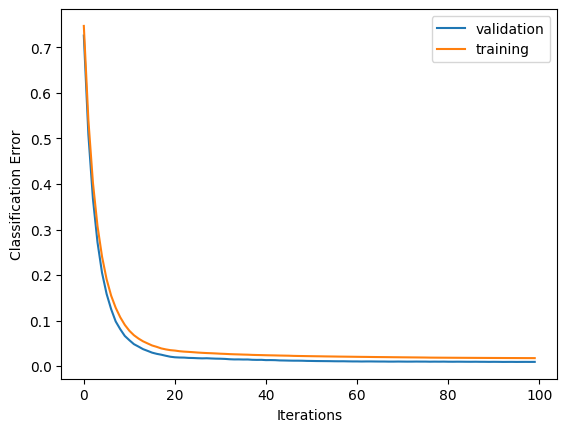

In [46]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into an XGBoost-compatible format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',  # Specify the learning task and the corresponding learning objective
    'num_class': 3,  # Number of classes in the dataset
    'tree_method': 'auto',  # Use the efficient tree building algorithm
    'nthread': -1,  # Use all available CPU threads
}

# Train the model
evallist = [(dtest, 'eval'), (dtrain, 'train')]  # Specify the datasets for evaluation during training
num_round = 100  # Number of rounds (iterations) to run
progress = dict()
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=progress)

# Plot the training loss
plt.plot(progress['eval']['mlogloss'], label='validation')
plt.plot(progress['train']['mlogloss'], label='training')
plt.xlabel("Iterations")
plt.ylabel("Classification Error")
plt.legend()
plt.show()


#### Using grid search to find the best hyperparameters for an XGBoost classifier on a built-in dataset from scikit-learn, and plotting the training loss:

The above code does the following:

- Import the necessary libraries: xgboost, scikit-learn's load_iris function, train_test_split function, GridSearchCV and matplotlib for plotting
- Load the Iris dataset and split it into training and test sets.
- Convert the data into an XGBoost-compatible format using xgb.DMatrix
- Define the parameters for the XGBoost model.
- Run a grid search using the GridSearchCV function to

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'nthread': -1, 'num_class': 3, 'objective': 'multi:softmax', 'subsample': 0.6, 'tree_method': 'auto'}
[02:34:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	eval-mlogloss:0.97211	train-mlogloss:0.97781
[1]	eval-mlogloss:0.86584	train-mlogloss:0.87562
[2]	eval-mlogloss:0.77531	train-mlogloss:0.79009
[3]	eval-mlogloss:0.69514	train-mlogloss:0.71414
[4]	eval-mlogloss:0.62713	train-mlogloss:0.64813
[5]	eval-mlogloss:0.57019	train-mlogloss:0.59289
[6]	eval-mlogloss:0.51925	train-mlogloss:0.54248
[7]	eval-mlogloss:0.47594	train-mlogloss:0.49836
[8]	eval-mlogloss:0.43117	train-mlogloss:0.45625
[9]	eval-mlogloss:0.39224	train-mlogloss:0.42046
[10]	eval-mlogloss:0.35623	train-mlogloss:0.38757
[11]	eval-mlogloss:0.32684	train-mlogloss:0.35687
[12]	eval-mlogloss:0.29971	train-mlogloss:0.32998
[13]	eval-mlogloss:0

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[83]	eval-mlogloss:0.02314	train-mlogloss:0.05523
[84]	eval-mlogloss:0.02346	train-mlogloss:0.05491
[85]	eval-mlogloss:0.02352	train-mlogloss:0.05466
[86]	eval-mlogloss:0.02316	train-mlogloss:0.05415
[87]	eval-mlogloss:0.02362	train-mlogloss:0.05383
[88]	eval-mlogloss:0.02277	train-mlogloss:0.05363
[89]	eval-mlogloss:0.02234	train-mlogloss:0.05344
[90]	eval-mlogloss:0.02266	train-mlogloss:0.05318
[91]	eval-mlogloss:0.02226	train-mlogloss:0.05306
[92]	eval-mlogloss:0.02260	train-mlogloss:0.05282
[93]	eval-mlogloss:0.02267	train-mlogloss:0.05262
[94]	eval-mlogloss:0.02252	train-mlogloss:0.05250
[95]	eval-mlogloss:0.02219	train-mlogloss:0.05229
[96]	eval-mlogloss:0.02222	train-mlogloss:0.05210
[97]	eval-mlogloss:0.02223	train-mlogloss:0.05186
[98]	eval-mlogloss:0.02151	train-mlogloss:0.05159
[99]	eval-mlogloss:0.02109	train-mlogloss:0.05128


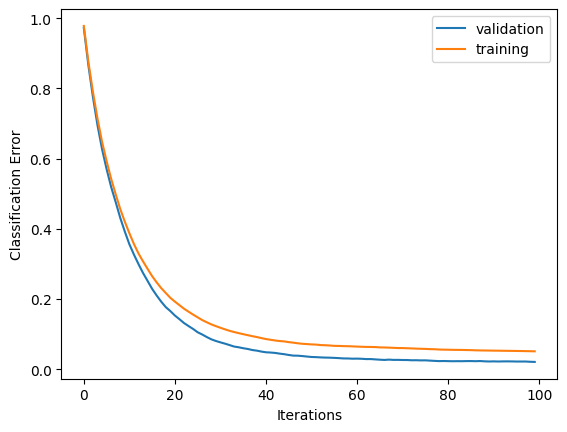

In [49]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into an XGBoost-compatible format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
param_grid = {
    'objective': ['multi:softmax'],  # Specify the learning task and the corresponding learning objective
    'num_class': [3],  # Number of classes in the dataset
    'tree_method': ['auto'],  # Use the efficient tree building algorithm
    'nthread': [-1],  # Use all available CPU threads
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'n_estimators': [50, 100]
}

# Define the model
model = xgb.XGBClassifier()

# Run GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Train the model with the best parameters
params = grid_search.best_params_
num_round = 100  # Number of rounds (iterations) to run
progress = dict()
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=progress)

# Plot the training loss
plt.plot(progress['eval']['mlogloss'], label='validation')
plt.plot(progress['train']['mlogloss'], label='training')
plt.xlabel("Iterations")
plt.ylabel("Classification Error")
plt.legend()
plt.show()


**Next Steps:**

- Understanding Overfitting and Underfitting: Learn about the concepts of overfitting and underfitting, and how they can affect the performance of a model on unseen data.

- Cross-Validation Techniques: Study different techniques of cross-validation, such as K-fold and Leave-one-out, and learn how to use them to evaluate and improve the performance of a model.

- Regularization Methods: Study the concepts of L1 and L2 regularization, and learn how to use them to prevent overfitting and improve the generalization of a model.

- Hyperparameter Tuning: Study the techniques of hyperparameter tuning, such as grid search and random search, and learn how to use them to find the optimal set of hyperparameters for a model.

- Ensembles: Study the concept of model ensembling and learn how to combine multiple models to improve the performance and robustness of a model.

- Evaluation Metrics: Study different evaluation metrics, such as accuracy, precision, recall and F1 score, and learn how to use them to evaluate the performance of a model.